##Customer Segmentation Using EDA, RFM Analysis, and KMeans Clustering.

## Table of Contents
- #####   [Introduction](#Introduction)
 - #####  [Goal](#Goal)
  - #####  [Description of the data](#Description-of-the-data)
- #####  [Summary info of data](#Datast-Info)
- #####  [Data Cleaning](#Data-Cleaning)
- #####  [Exploratory Data Analysis](#Exploratory-Data-Analysis)
 - ##### [Sales Analysis](#Sales-Analysis)
 - ##### [Product Analysis](#Product-Analysis)
 - ##### [Time-based Analysis](#Time-based-Analysis)
 - ##### [Geographic Insight](#Geographic-Insight)
 - ##### [Quantity Patterns](#Quantity-Patterns)
 - ##### [Customer Behavior](#Customer-Behavior)
- #####  [RFM Analysis](#RFM-Analysis)
 - ##### [Recency of purchase](#Recency-of-purchase)
 - ##### [Frequency of purchase](#Frequency-of-purchase)
 - ##### [Monetary Value per customer](#Monetary-Value-per-customer)
- #####  [Customer Segmentation](#Customer-Segmentation)
- #####  [Conclusion](#Conclusion)


##### Goal
The goal is to perform customer segmentation analysis of a sales dataset.


#####Description of data
- *InvoiceNo	Unique* — Invoice number (can show transactions)
- *StockCode* — Product identifier
- *Description* — Product name
- *Quantity* — 	Units sold in that invoice
- *InvoiceDate*	— Date/time of purchase
- *UnitPrice*	— Price per unit
- *CustomerID* — Customer identifier
- *Country*	— Country of purchase



#### Imports

In [71]:
# libraries importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew # for skewness

In [72]:
# load dataset
df = pd.read_excel("/content/customer_segmentation.xlsx")

In [73]:
# first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice ($),CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom


In [74]:
# last 5 rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice ($),CustomerID,Country
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,12:50:00,0.85,12680.0,France
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,12:50:00,2.10,12680.0,France
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,12:50:00,4.15,12680.0,France
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,12:50:00,4.15,12680.0,France
530103,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,12:50:00,4.95,12680.0,France


##### Summary Info of data
- ##### Understanding the data (structure and characteristics)

In [75]:
# Dimensions of the dataset
df.shape

(530104, 9)

The data has 530104 rows and 9 columns.

In [76]:
# Column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'InvoiceTime', 'UnitPrice ($)', 'CustomerID', 'Country'],
      dtype='object')

In [77]:
# dataset summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530104 entries, 0 to 530103
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      530104 non-null  object        
 1   StockCode      530104 non-null  object        
 2   Description    530104 non-null  object        
 3   Quantity       530104 non-null  int64         
 4   InvoiceDate    530104 non-null  datetime64[ns]
 5   InvoiceTime    530104 non-null  object        
 6   UnitPrice ($)  530104 non-null  float64       
 7   CustomerID     397884 non-null  float64       
 8   Country        530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 36.4+ MB


There are missing values in the CustomerID column.



In [78]:
# Descriptive statistics of numeric features
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,530104.0,10.542037,1.0,1.0,3.0,10.0,80995.0,155.524124
InvoiceDate,530104,2011-07-04 06:41:32.069480448,2010-12-01 00:00:00,2011-03-28 00:00:00,2011-07-20 00:00:00,2011-10-19 00:00:00,2011-12-09 00:00:00,NaN
UnitPrice ($),530104.0,3.907625,0.001,1.25,2.08,4.13,13541.33,35.915681
CustomerID,397884.0,15294.423453,12346.0,13969.0,15159.0,16795.0,18287.0,1713.14156


### Data Cleaning
- Check & remove duplicates
- Check & handle missing values
- Correct data types
- Clean the description feature
- Check and handle outliers


#### Check & remove duplicates

In [79]:
# Check for duplicates

duplicate = df[df.duplicated()]

# duplicate count
duplicate_count = duplicate.shape[0]
print(f"Number of duplicates in the dataset are:{duplicate_count}")

# drop the duplicates
df.drop_duplicates(inplace=True)


Number of duplicates in the dataset are:5226


In [80]:
# Verifying if there're duplicates
df.duplicated().any()

np.False_

#### Check & handle missing data

In [81]:
# Check for missing values
df_missing = df.isnull().sum()
print(f"\nNumber of missing rows in the column is:")
print(f"\n{df_missing}")


Number of missing rows in the column is:

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
InvoiceTime           0
UnitPrice ($)         0
CustomerID       132186
Country               0
dtype: int64


customerID is missing with 132186 rows

In [82]:
perc_missing = df_missing / len(df) * 100
print(f"\nPercentage of missing rows in the column is:")
print(f"\n{perc_missing}")


Percentage of missing rows in the column is:

InvoiceNo         0.000000
StockCode         0.000000
Description       0.000000
Quantity          0.000000
InvoiceDate       0.000000
InvoiceTime       0.000000
UnitPrice ($)     0.000000
CustomerID       25.184138
Country           0.000000
dtype: float64


##### Because this analysis focuses on customer segmentation, any rows with missing CustomerID should be excluded.

In [83]:
# drop the missing values
df.dropna(subset=["CustomerID"], inplace=True)

# verify effectiveness
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
InvoiceTime,0
UnitPrice ($),0
CustomerID,0
Country,0


#### Correct data types

In [84]:
# Check data types
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
InvoiceTime,object
UnitPrice ($),float64
CustomerID,float64
Country,object


In [85]:
# convert CustomerID from float to int
df["CustomerID"] = df["CustomerID"].astype(int)

##### We'll extract the hour from the invoice time.

In [86]:
# df["Hour"] = df["InvoiceTime"].dt.hour

#### Clean the description column

In [87]:
# Original format of the description column
df["Description"].sample(5)

,Description
194760,WRAP POPPIES DESIGN
209939,60 CAKE CASES DOLLY GIRL DESIGN
190248,GREEN REGENCY TEACUP AND SAUCER
192888,SMALL CHOCOLATES PINK BOWL
475783,HOT BATHS METAL SIGN


In [88]:
# Clean the description column
df["Description"] = df["Description"].str.strip().str.lower()
df["Description"].head()

,Description
0,white hanging heart t-light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart.


#### Check and handle outliers

<Axes: >

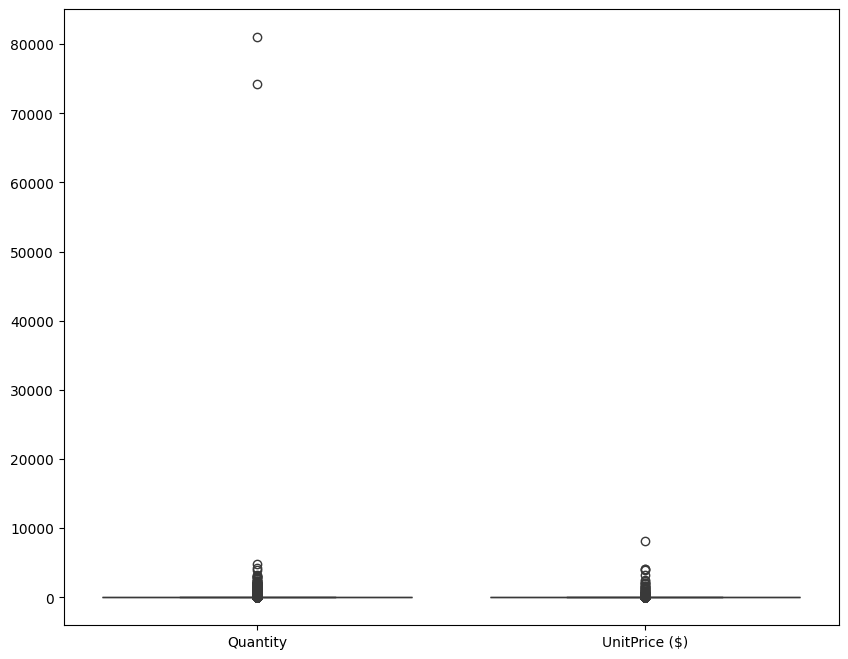

In [89]:
# Checing for outliers in the quantity & unitprice column
outliers = df[["Quantity", "UnitPrice ($)"]]

plt.figure(figsize=(10,8))
sns.boxplot(data=outliers, palette="viridis")

Quantity and product prices naturally vary. We observed that the values flagged as outliers in the 'Quantity' feature were misclassified, so we decided to retain them. However, the products with unusually high unit prices were labeled as 'POST', 'DOTCOM POSTAGE', or 'MANUAL'. These typically refer to shipping or delivery fees, or special entries not linked to regular products. To avoid skewing the analysis, we removed them,

In [90]:
# outliers
print(df.sort_values(by =["UnitPrice ($)"], ascending=False).head(2))

       InvoiceNo StockCode Description  Quantity InvoiceDate InvoiceTime  \
169097    551697      POST     postage         1  2011-05-03    13:46:00   
412410    573077         M      manual         1  2011-10-27    14:13:00   

        UnitPrice ($)  CustomerID         Country  
169097        8142.75       16029  United Kingdom  
412410        4161.06       12536          France  


In [91]:
# drop rows in description with the text
def remove_manual(df):
  remove_list = ["MANUAL", "DOTCOME POSTAGE", "POSTAGE"]
  pattern = '|'.join(remove_list)
  df = df[~df["Description"].str.upper().str.contains(pattern, na=False)]
  return df

df = remove_manual(df)

In [92]:
# Verify outliers removal
print(df.sort_values(by =["UnitPrice ($)"], ascending=False).head(2))

       InvoiceNo StockCode                     Description  Quantity  \
217307    556446     22502  picnic basket wicker 60 pieces         1   
217306    556444     22502  picnic basket wicker 60 pieces        60   

       InvoiceDate InvoiceTime  UnitPrice ($)  CustomerID         Country  
217307  2011-06-10    15:33:00          649.5       15098  United Kingdom  
217306  2011-06-10    15:28:00          649.5       15098  United Kingdom  


### Exploratory Data Analysis (EDA)
- Sales Analysis i.e sales performance
- Product Analysis
- Time-based Analysis
- Geographic Insight
- Quantity Patterns
- Customer Behavior



### Sales Performance
- Total sales
- Average Order Value
- Total revenue
- Average Quantity per Invoice
- Total number of transactions



In [93]:
# Total Sales (Per Row)
df.loc[:,"TotalSales"] = df["UnitPrice ($)"] * df["Quantity"]

In [94]:
# Total spending per transaction| total spending for a single transaction.
invoice_totals = df.groupby("InvoiceNo")["TotalSales"].sum().reset_index()
invoice_totals.columns = ["InvoiceNo", "InvoiceTotal"]

# Average order value per transaction
average_order_value = invoice_totals["InvoiceTotal"].mean()
print(f"Average Order Value per Invoice: ${average_order_value:.2f}")


Average Order Value per Invoice: $474.81


In [95]:
# Total Revenue (Grand Total)
total_revenue = df["TotalSales"].sum()
total_revenue

np.float64(8744078.644000001)

In [96]:
# Average quantity per invoice (order)
avg_quantity_per_trans = df.groupby("InvoiceNo")["Quantity"].sum().mean()
print(f"Average quantity per transaction: {avg_quantity_per_trans:.2f}")

Average quantity per transaction: 279.21


In [97]:
# Total transaction
total_transaction = df["InvoiceNo"].nunique()

print(f"Total transaction:", total_transaction)

Total transaction: 18416


18416 transactions happened in total

### Product Analysis
- Unique Product
- Top-selling products by quantity
- Top products by revenue
- Average unit price by product

In [98]:
# Number of unique products
Unique_products = df["Description"].nunique()
print(f"Number of unique products are:", Unique_products)

Number of unique products are: 3863


In [99]:
# Top-selling products by quantity. Top 10
top_product_qtity = df.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(10)
top_product_qtity

,Quantity
Description,
"paper craft , little birdie",80995
medium ceramic top storage jar,77916
world war 2 gliders asstd designs,54319
jumbo bag red retrospot,46078
white hanging heart t-light holder,36706
assorted colour bird ornament,35263
pack of 72 retrospot cake cases,33670
popcorn holder,30919
rabbit night light,27153


/tmp/ipython-input-100-2950596664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_qt, x="Quantity", y="Description", palette="viridis")


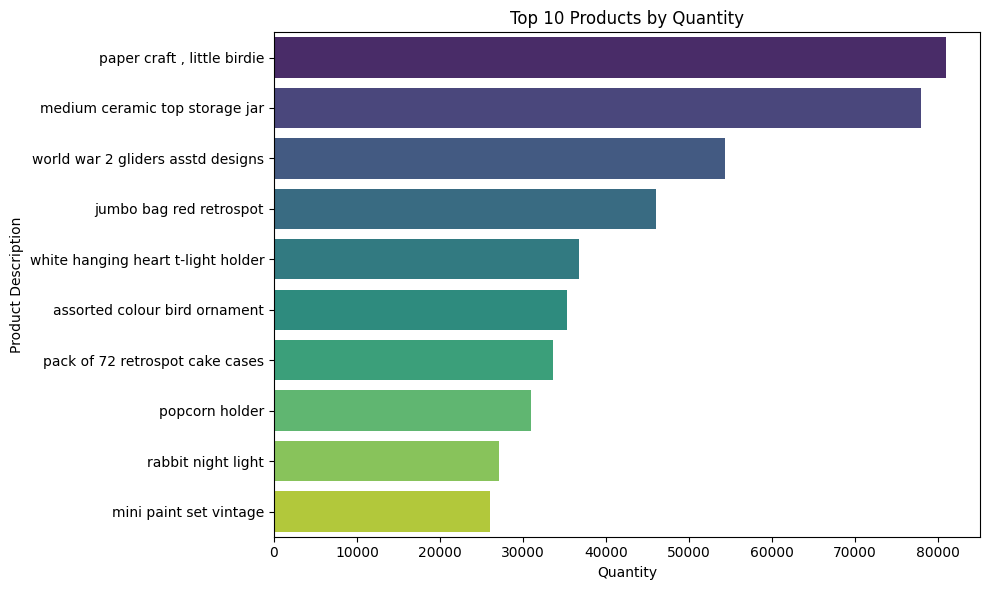

In [100]:
# Visualization of top-selling products by quantity
top_products_qt = top_product_qtity.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_qt, x="Quantity", y="Description", palette="viridis")

plt.title("Top 10 Products by Quantity")
plt.xlabel("Quantity")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

In [101]:
# Top-selling products by Revenue
top_products_rev = df.groupby("Description")["TotalSales"].sum().sort_values(ascending=False).head(10)
top_products_rev


,TotalSales
Description,
"paper craft , little birdie",168469.60
regency cakestand 3 tier,142264.75
white hanging heart t-light holder,100392.10
jumbo bag red retrospot,85040.54
medium ceramic top storage jar,81416.73
party bunting,68785.23
assorted colour bird ornament,56413.03
rabbit night light,51251.24
chilli lights,46265.11


/tmp/ipython-input-102-2927237550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_df, x="TotalSales", y="Description", palette="viridis")


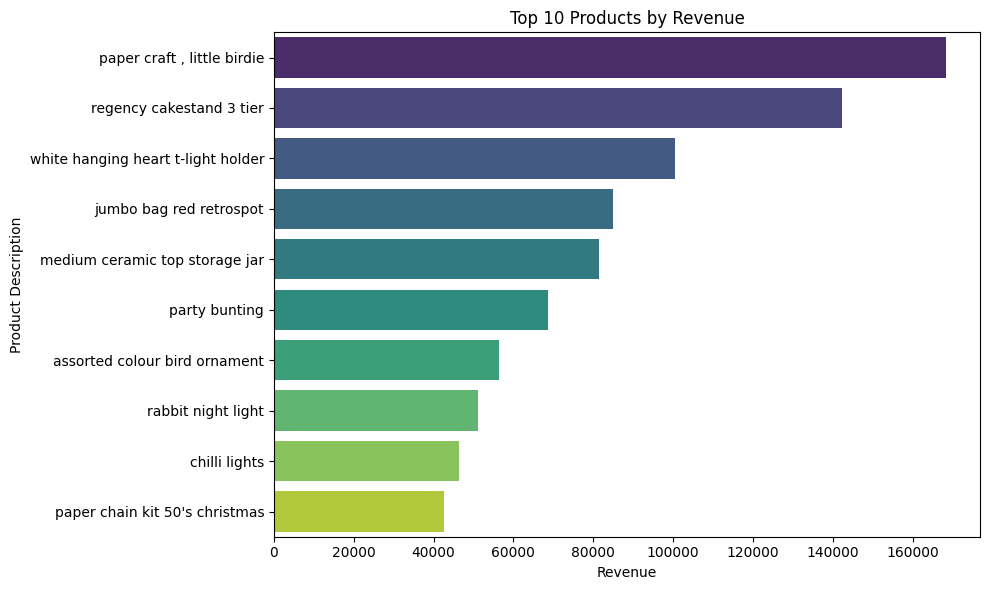

In [102]:
# Visualization of top-selling products by revenue
top_products_df = top_products_rev.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_df, x="TotalSales", y="Description", palette="viridis")

plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()


In [103]:
# Average unit by product
avg_unit_product = df.groupby("Description")["Quantity"].mean().sort_values(ascending=False).head(10)
avg_unit_product


,Quantity
Description,
"paper craft , little birdie",80995.000000
tea time tea towels,1300.000000
girls alphabet iron on patches,480.000000
medium ceramic top storage jar,393.515152
essential balm 3.5g tin in envelope,325.333333
set/5 red spotty lid glass bowls,288.000000
boys alphabet iron on patches,249.600000
small chinese style scissor,246.814815
miseltoe heart wreath cream,240.000000


###Time-Based Analysis
- Monthly sales trend over time
- Peak shopping months/days

In [104]:
# Extract Month, week and day name from the date
df["Month"] = df["InvoiceDate"].dt.to_period("M")       # e.g., 2023-07
df["Week"] = df["InvoiceDate"].dt.to_period("W")        # Week number
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()       # e.g., Monday


In [105]:
# Convert time to proper time format
df["Time"] = pd.to_datetime(df["InvoiceTime"], format="%H:%M:%S").dt.time

# Extract Hour
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour

#### Monthly Trends

<Axes: title={'center': 'Monthly Sales Trend Over Time'}, xlabel='Month'>

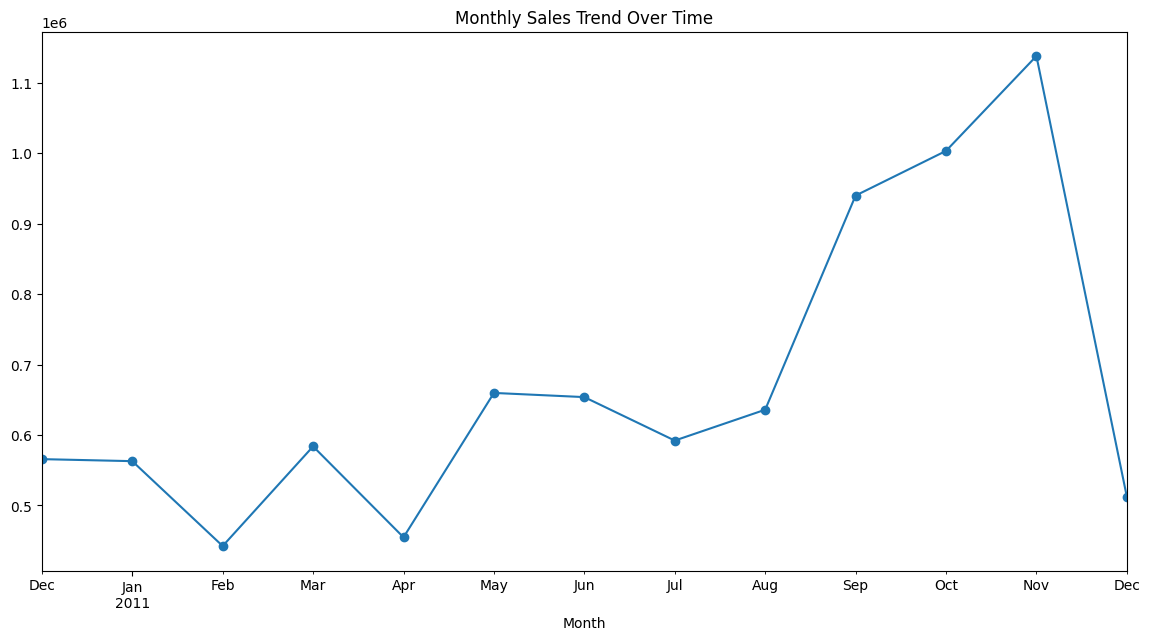

In [106]:
# Monthly trends
monthly_sales = df.groupby("Month")["TotalSales"].sum()

# Plot
monthly_sales.plot(kind="line", marker = "o", figsize=(14, 7), title="Monthly Sales Trend Over Time")

In [107]:
# Top 5 Peak shopping months
monthly_sales.sort_values(ascending=False).head(5)


,TotalSales
Month,
2011-11,1137664.000
2011-10,1003056.560
2011-09,939682.632
2011-05,659693.490
2011-06,653764.920


In [108]:
# Peak shopping days
df.groupby("DayOfWeek")["TotalSales"].sum().sort_values(ascending=False)

,TotalSales
DayOfWeek,
Thursday,1941119.910
Tuesday,1673648.121
Wednesday,1560549.250
Friday,1460762.081
Monday,1327760.481
Sunday,780238.801


/tmp/ipython-input-109-1826076591.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_sales.index, y=day_sales.values, palette="viridis")


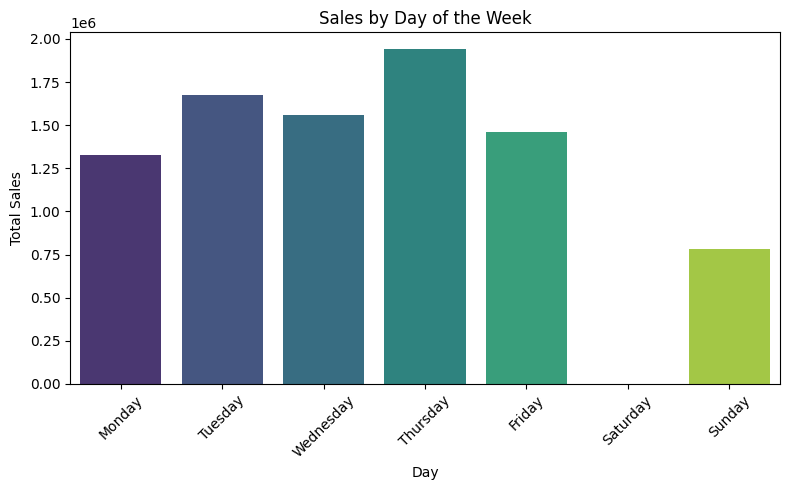

In [109]:
# Plot by day of the week
day_sales = df.groupby("DayOfWeek")["TotalSales"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(8,5))
sns.barplot(x=day_sales.index, y=day_sales.values, palette="viridis")
plt.title("Sales by Day of the Week")
plt.ylabel("Total Sales")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Sales by Hour of Day'}, xlabel='Hour'>

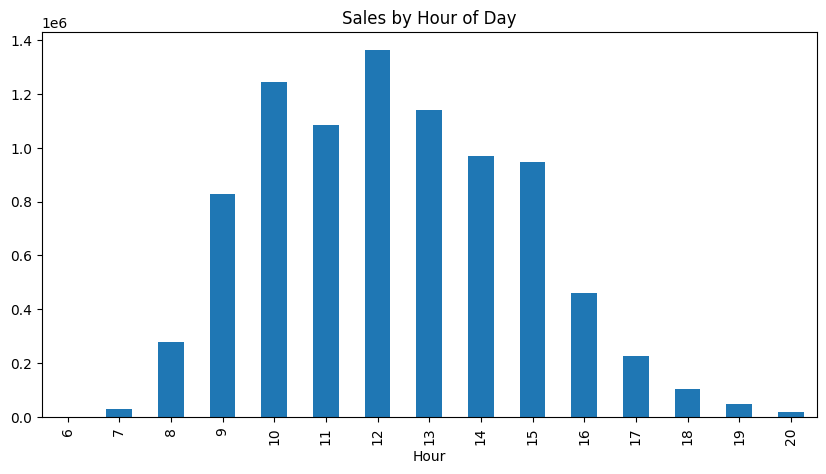

In [110]:
# Pick time with highest sales
hourly_sales = df.groupby("Hour")["TotalSales"].sum()
hourly_sales.plot(kind="bar", figsize=(10,5), title="Sales by Hour of Day")

###Geographic Insights
- Revenue by country
- Top countries by transaction volume


In [111]:
# Revenue by country
revenue_by_country = df.groupby("Country")["TotalSales"].sum().sort_values(ascending = False)

revenue_by_country

,TotalSales
Country,
United Kingdom,7244495.324
Netherlands,283889.340
EIRE,261888.120
Germany,205381.150
France,183987.940
Australia,138103.810
Spain,55706.560
Switzerland,52441.950
Japan,37416.370


In [112]:
# Top countries by transaction volme
top_countries_by_vol = df.groupby("Country")["Quantity"].sum().sort_values(ascending = False)
top_countries_by_vol

,Quantity
Country,
United Kingdom,4234357
Netherlands,200258
EIRE,140131
Germany,118032
France,110597
Australia,83890
Sweden,36037
Switzerland,29980
Spain,27724


#### Quantity Patterns
- Detect bulk purchases
- Most active buyers

In [113]:
# Bulk purchase
bulk_qty = df.groupby("InvoiceNo")["Quantity"].sum()
bulk_purchase = bulk_qty[bulk_qty >= 1000]

print(f"Number of bulk orders (1000+ items): {bulk_purchase.shape[0]}")


Number of bulk orders (1000+ items): 626


#### Most active buyers

In [114]:
top_customers_by_quantity = df.groupby("CustomerID")["Quantity"].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Total Quantity Purchased:")


# Getting the customers country info
top_customers_df = top_customers_by_quantity.reset_index()
top_customers_df.columns = ["CustomerID", "TotalQuantity"]

# Adding country info (get unique CustomerID–Country pairs)
customer_country = df[["CustomerID", "Country"]].drop_duplicates()

# Merging to get country alongside quantity
top_customers_with_country = pd.merge(top_customers_df, customer_country, on="CustomerID", how="left")

print(top_customers_with_country)


Top 5 Customers by Total Quantity Purchased:
   CustomerID  TotalQuantity         Country
0       14646         196844     Netherlands
1       16446          80997  United Kingdom
2       14911          80238            EIRE
3       12415          77373       Australia
4       12346          74215  United Kingdom


### Customer Insights
- Number of unique customers
- Repeat Purchases per Customer
- Most active customers by number of purchases
- Top Customers by spend

In [115]:
# Number of customers
num_customers = df["CustomerID"].count()
print(f"Number of Customers is:", num_customers)

Number of Customers is: 391298


In [116]:
# Unique customers
num_unique_customers = df["CustomerID"].nunique()
print(f"Number of Unique Customers is:", num_unique_customers)

Number of Unique Customers is: 4335


In [117]:
# Repeat Purchases per Customer
repeat_purchases = df.groupby("CustomerID")["InvoiceNo"].nunique()

# Average number of purchases per customer
avg_repeat_purchases_per_customer = repeat_purchases.mean()

print(f"Average Number of Purchases per Customer: {avg_repeat_purchases_per_customer:.2f}")


Average Number of Purchases per Customer: 4.25


On average, each customer made 4.25 purchases (invoices) over the time period.

In [118]:
repeat_customers = repeat_purchases[repeat_purchases > 1].count()
print(f"Number of repeat customers: {repeat_customers}")

Number of repeat customers: 2830


2,830 customers made more than one purchase (i.e., they came back at least once)


 #### Most active customers by number of purchases

In [119]:
# Top customers by purchases
top_customers_by_orders = df.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending= False).head(10)
top_customers_by_orders

,InvoiceNo
CustomerID,
12748,206
14911,199
17841,124
13089,97
14606,91
15311,91
12971,86
14646,72
16029,62


These are the customers that have the most invoices (orders)

In [120]:
# Top customers by spend
top_customers_by_revenue = df.groupby("CustomerID")["TotalSales"].sum().sort_values(ascending= False).head(10)
top_customers_by_revenue

,TotalSales
CustomerID,
14646,279138.02
18102,259657.30
17450,194390.79
16446,168472.50
14911,140336.83
12415,124564.53
14156,117210.08
17511,91062.38
12346,77183.60


In [121]:
summary = df.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",
    "TotalSales": "sum"
}).rename(columns={
    "InvoiceNo": "NumPurchases",
    "TotalSales": "TotalRevenue"
}).sort_values(by="TotalRevenue", ascending=False).head(10)

print(summary)


            NumPurchases  TotalRevenue
CustomerID                            
14646                 72     279138.02
18102                 60     259657.30
17450                 46     194390.79
16446                  2     168472.50
14911                199     140336.83
12415                 20     124564.53
14156                 55     117210.08
17511                 31      91062.38
12346                  1      77183.60
16029                 62      72708.09


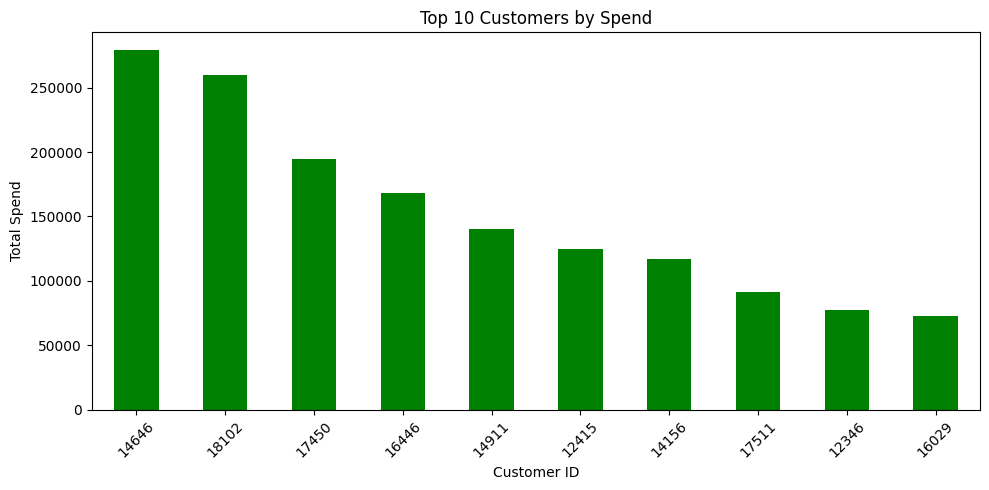

In [154]:
# Plot of customers by spend
top_customers_by_revenue.plot(kind='bar', figsize=(10,5), color='green')
plt.title("Top 10 Customers by Spend")
plt.ylabel("Total Spend")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### RFM Analysis
- Recency of purchase
- Frequency of purchase
- Monetary Value per customer



In [123]:
# Recency of purchase
day = "2012-01-01"
day= pd.to_datetime(day)
#df["InvoiceDate"]=pd.to_datetime(df["Date"]). the invoicedate has been converted earlier

recency = df.groupby(["CustomerID"]).agg({"InvoiceDate":lambda x:((day-x.max()).days)})
recency

,InvoiceDate
CustomerID,
12346,348
12347,25
12348,98
12349,41
12350,333
...,...
18280,300
18281,203
18282,30


In [124]:
# Frequency of purchase
freq = df.drop_duplicates(subset="InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()
freq

,InvoiceNo
CustomerID,
12346,1
12347,7
12348,4
12349,1
12350,1
...,...
18280,1
18281,1
18282,2


In [125]:
# Monetary Value per customer
money = df.groupby(["CustomerID"])[["TotalSales"]].sum()
money

,TotalSales
CustomerID,
12346,77183.60
12347,4310.00
12348,1437.24
12349,1457.55
12350,294.40
...,...
18280,180.60
18281,80.82
18282,178.05


In [131]:
# Into a dataframe
RFM = pd.concat([recency,freq,money], axis=1)
recency.columns =["Recency"]
freq.columns = ["Frequency"]
money.columns = ["Monetary"]

RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346,348,1,77183.60
12347,25,7,4310.00
12348,98,4,1437.24
12349,41,1,1457.55
12350,333,1,294.40
...,...,...,...
18280,300,1,180.60
18281,203,1,80.82
18282,30,2,178.05


### Customer Segmentation

In [133]:
# Import libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)

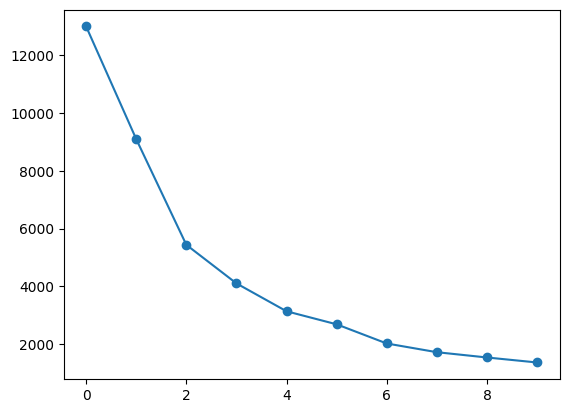

In [134]:
from sklearn.cluster import KMeans

# Elbow method to find optimal number of clusters
cs = []
cluster_range = range(1,11)

for i in cluster_range:
  kmeans =KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled)
  cs.append(kmeans.inertia_)

plt.plot(cs,marker="o")

There are 3 clusters

In [135]:
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled)
RFM["Clusters"] = (kmeans.labels_+1)
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346,348,1,77183.60,2
12347,25,7,4310.00,1
12348,98,4,1437.24,1
12349,41,1,1457.55,1
12350,333,1,294.40,2
...,...,...,...,...
18280,300,1,180.60,2
18281,203,1,80.82,2
18282,30,2,178.05,1


In [150]:
# Group the
group = RFM.groupby(["Clusters"])[["Recency","Frequency","Monetary"]].mean()
group

,Recency,Frequency,Monetary
Clusters,,,
1,63.889888,4.656017,1834.613959
2,269.649171,1.570902,624.259992
3,28.520000,67.960000,86053.475600


In [151]:
def rfm_level(score):
  if score["Clusters"] == 1:
    return "Promising Customers"
  elif score["Clusters"]== 2:
    return "Lapsed Customers"
  else:
    return "Loyal Customers"

RFM["Conditions"] = RFM.apply(rfm_level, axis=1)
RFM

,Recency,Frequency,Monetary,Clusters,Conditions,ClusterLabel
CustomerID,,,,,,
12346,348,1,77183.60,2,Lapsed Customers,Lapsed Customers
12347,25,7,4310.00,1,Promising Customers,Promising Customers
12348,98,4,1437.24,1,Promising Customers,Promising Customers
12349,41,1,1457.55,1,Promising Customers,Promising Customers
12350,333,1,294.40,2,Lapsed Customers,Lapsed Customers
...,...,...,...,...,...,...
18280,300,1,180.60,2,Lapsed Customers,Lapsed Customers
18281,203,1,80.82,2,Lapsed Customers,Lapsed Customers
18282,30,2,178.05,1,Promising Customers,Promising Customers


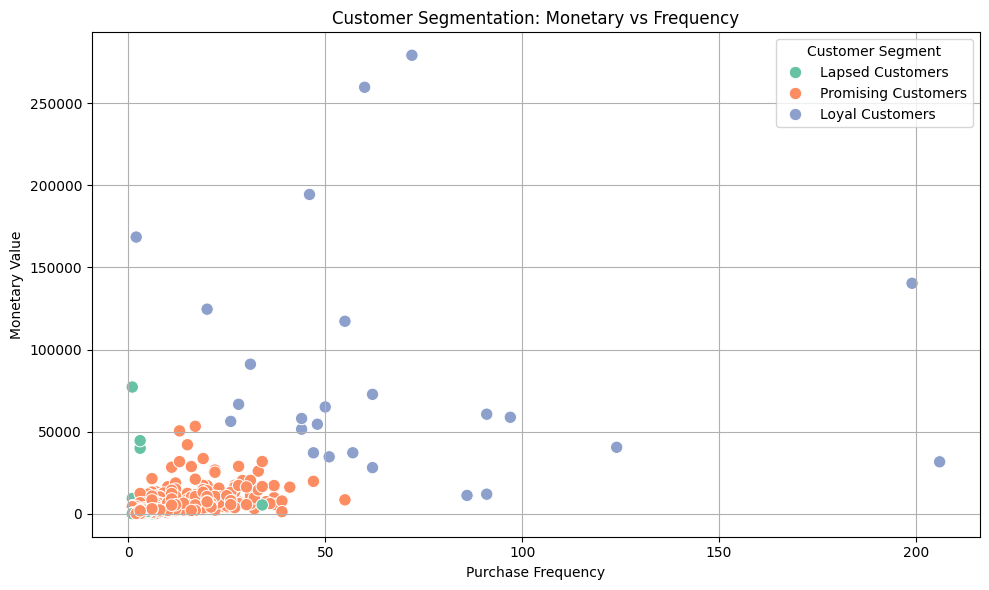

In [149]:
# Scatter plot: Monetary vs Frequency colored by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=RFM, x="Frequency", y="Monetary", hue="ClusterLabel", palette="Set2", s=80)

plt.title("Customer Segmentation: Monetary vs Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("Monetary Value")
plt.legend(title="Customer Segment")
plt.grid(True)
plt.tight_layout()
plt.show()


In [152]:
# Number of each cluster
result = RFM["Conditions"].value_counts()
result

,count
Conditions,
Promising Customers,3224
Lapsed Customers,1086
Loyal Customers,25


We only have 25 loyal customers, 3224 promising customers and 1086 lapsed customers

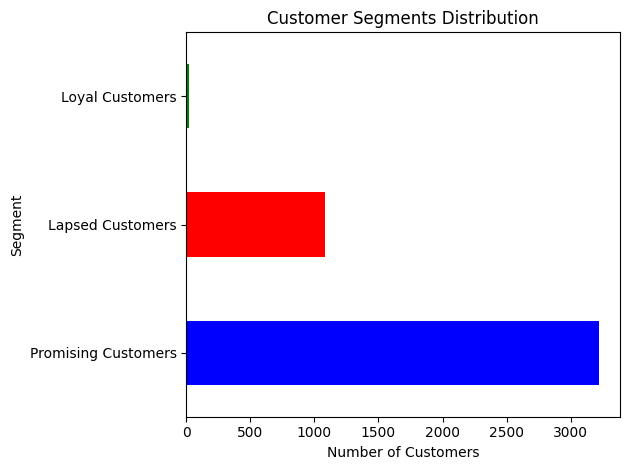

In [153]:
colors = {
    "Promising Customers": "blue",
    "Lapsed Customers": "red",
    "Loyal Customers": "green"
}

result.plot(kind="barh", color=[colors[label] for label in result.index])

plt.title("Customer Segments Distribution")
plt.xlabel("Number of Customers")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()



#### Conclusion
This project gave me a deeper understanding of customer behavior by combining exploratory data analysis with RFM modeling and clustering. Using these techniques, I was able to segment customers into meaningful groups like loyal, lapsed, and promising buyers. These insights can help any business tailor its marketing strategies, improve retention, and drive smarter decisions backed by data.